In [119]:
import pandas as pd
import numpy as np
from pathlib import Path
import altair as alt

import seaborn as sns
from textwrap import wrap

import matplotlib.pyplot as plt


## Datos poblacion 2020 INE

In [120]:
# download INE 2017 county population data

country_population_raw = pd.read_csv("https://www.ine.cl/docs/default-source/proyecciones-de-poblacion/cuadros-estadisticos/base-2017/ine_estimaciones-y-proyecciones-2002-2035_base-2017_comunas0381d25bc2224f51b9770a705a434b74.csv",
            encoding='ISO-8859-1',thousands='.')


centrosur = ["Biobío","Libertador General Bernardo O'Higgins","Maule","Ñuble"]

# seleccionar macrozona.
region_population_zona = country_population_raw[country_population_raw["Nombre Region"].isin(centrosur)]

In [121]:
country_population_raw["Nombre Region"].unique()

array(['Tarapacá', 'Antofagasta', 'Atacama', 'Coquimbo', 'Valparaíso',
       "Libertador General Bernardo O'Higgins", 'Maule', 'Biobío',
       'La Araucanía', 'Los Lagos',
       'Aysén del General Carlos Ibáñez del Campo',
       'Magallanes y de la Antártica Chilena',
       'Metropolitana de Santiago', 'Los Ríos', 'Arica y Parinacota',
       'Ñuble'], dtype=object)

In [122]:
region_population_zona_f1 = region_population_zona[['Sexo (1=Hombre 2=Mujer)', "Edad", "Nombre Region", "Poblacion 2020"]]
# rename columns
region_population_zona_f1 = region_population_zona_f1.rename(columns={"Sexo (1=Hombre 2=Mujer)": "Sexo", "Nombre Region": "Region"})

#sexo a categorical
region_population_zona_f1.loc[:,"Sexo"] = np.where(region_population_zona_f1["Sexo"]==1,"Hombre","Mujer")

region_population_zona_f1.head()

,Sexo,Edad,Region,Poblacion 2020
12636,Hombre,0,Libertador General Bernardo O'Higgins,1610
12637,Hombre,1,Libertador General Bernardo O'Higgins,1621
12638,Hombre,2,Libertador General Bernardo O'Higgins,1665
12639,Hombre,3,Libertador General Bernardo O'Higgins,1757
12640,Hombre,4,Libertador General Bernardo O'Higgins,1883


In [123]:
region_zona_menores15 = region_population_zona_f1.query("Edad < 15")
region_zona_mayores15 = region_population_zona_f1.query("Edad >= 15")

In [124]:
region_pop2020_mayores15 = region_zona_mayores15.groupby(["Region"]).sum().drop(columns=["Edad"])
region_pop2020_menores15 = region_zona_menores15.groupby(["Region"]).sum().drop(columns=["Edad"])

In [125]:
region_zona_mayores15.groupby(["Region"]).sum().drop(columns=["Edad"])

,Poblacion 2020
Region,
Biobío,1346590
Libertador General Bernardo O'Higgins,796493
Maule,910905
Ñuble,416116


In [126]:
region_pop2020_total = region_population_zona_f1.groupby(["Region"]).sum().drop(columns=["Edad"])

## Datos defunciones DEIS

In [127]:
columnas_deis = ["ANO_DEF","FECHA_DEF","GLOSA_SEXO","EDAD_TIPO","EDAD_CANT","CODIGO_COMUNA_RESIDENCIA","GLOSA_COMUNA_RESIDENCIA",
                 "GLOSA_REG_RES","DIAG1","CAPITULO_DIAG1","GLOSA_CAPITULO_DIAG1","CODIGO_GRUPO_DIAG1","GLOSA_GRUPO_DIAG1",
                 "CODIGO_CATEGORIA_DIAG1","GLOSA_CATEGORIA_DIAG1","CODIGO_SUBCATEGORIA_DIAG1","GLOSA_SUBCATEGORIA_DIAG1",
                 "DIAG2","CAPITULO_DIAG2","GLOSA_CAPITULO_DIAG2","CODIGO_GRUPO_DIAG2","GLOSA_GRUPO_DIAG2","CODIGO_CATEGORIA_DIAG2",
                 "GLOSA_CATEGORIA_DIAG2","CODIGO_SUBCATEGORIA_DIAG2","GLOSA_SUBCATEGORIA_DIAG2","LUGAR_DEFUNCION"]

datos_deis = pd.read_csv("data/datos_DEIS/DEFUNCIONES_FUENTE_DEIS_2016_2021_21102021.csv",sep=";",encoding="ISO-8859-1",names=columnas_deis)

In [128]:
region_newmap = {"De Los Lagos":"Los Lagos","De Valparaíso":"Valparaíso","Del Bíobío":"Biobío",
                 "Metropolitana de Santiago":"Metropolitana de Santiago","Del Maule":"Maule",
                 "De Magallanes y de La Antártica Chilena":"Magallanes y de La Antártica Chilena",
                "Del Libertador B. O'Higgins":"Libertador General Bernardo O'Higgins","De Coquimbo":"Coquimbo",
                "De La Araucanía":"La Araucanía","De Atacama":"Atacama","De Antofagasta":"Antofagasta",
                "De Tarapacá":"Tarapacá", "De Arica y Parinacota": "Arica y Parinacota", "De Los Ríos":"Los Ríos",
                 "De Aisén del Gral. C. Ibáñez del Campo": "Aysén del General Carlos Ibáñez del Campo",
                 "De Ñuble":"Ñuble","Ignorada":"Ignorada"}

In [129]:
datos_deis.head()

,ANO_DEF,FECHA_DEF,GLOSA_SEXO,EDAD_TIPO,EDAD_CANT,CODIGO_COMUNA_RESIDENCIA,GLOSA_COMUNA_RESIDENCIA,GLOSA_REG_RES,DIAG1,CAPITULO_DIAG1,...,DIAG2,CAPITULO_DIAG2,GLOSA_CAPITULO_DIAG2,CODIGO_GRUPO_DIAG2,GLOSA_GRUPO_DIAG2,CODIGO_CATEGORIA_DIAG2,GLOSA_CATEGORIA_DIAG2,CODIGO_SUBCATEGORIA_DIAG2,GLOSA_SUBCATEGORIA_DIAG2,LUGAR_DEFUNCION
0,2021,2021-01-21,Mujer,1,89,10202,Ancud,De Los Lagos,C20X,C00-D48,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación
1,2021,2021-06-18,Hombre,1,90,5101,Valparaíso,De Valparaíso,U071,U00-U99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación
2,2021,2021-03-16,Mujer,1,89,5801,Quilpué,De Valparaíso,J439,J00-J99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación
3,2021,2021-03-19,Mujer,1,93,5601,San Antonio,De Valparaíso,J449,J00-J99,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación
4,2021,2021-01-05,Mujer,1,94,5109,Viña del Mar,De Valparaíso,C229,C00-D48,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación


In [130]:
# rename regions by mapping
datos_deis.loc[:,"GLOSA_REG_RES"] = datos_deis["GLOSA_REG_RES"].map(region_newmap)

# rename important columns
datos_deis.rename(columns={"GLOSA_SEXO": "Sexo", "GLOSA_REG_RES": "Region"},inplace=True)

In [131]:
# select only R.M.
datos_deis_zona = datos_deis.query(
    "ANO_DEF == 2020 & Region in @centrosur")
deis_zona_menores15 = datos_deis_zona.query("EDAD_TIPO < 15")

In [132]:
datos_deis_zona["Region"].unique()

array(["Libertador General Bernardo O'Higgins", 'Maule', 'Ñuble',
       'Biobío'], dtype=object)

In [133]:
# separate data by 15 year and older
deis_zona_menores15 = datos_deis_zona.query("EDAD_CANT < 15")
deis_zona_mayores15 = datos_deis_zona.query("EDAD_CANT >= 15")

In [134]:
deis_zona_menores15.query("GLOSA_CAPITULO_DIAG1 == 'Códigos para propósitos especiales'").iloc[:,10:]

,GLOSA_CAPITULO_DIAG1,CODIGO_GRUPO_DIAG1,GLOSA_GRUPO_DIAG1,CODIGO_CATEGORIA_DIAG1,GLOSA_CATEGORIA_DIAG1,CODIGO_SUBCATEGORIA_DIAG1,GLOSA_SUBCATEGORIA_DIAG1,DIAG2,CAPITULO_DIAG2,GLOSA_CAPITULO_DIAG2,CODIGO_GRUPO_DIAG2,GLOSA_GRUPO_DIAG2,CODIGO_CATEGORIA_DIAG2,GLOSA_CATEGORIA_DIAG2,CODIGO_SUBCATEGORIA_DIAG2,GLOSA_SUBCATEGORIA_DIAG2,LUGAR_DEFUNCION
234816,Códigos para propósitos especiales,U00-U49,Asignación provisoria de nuevas afecciones de ...,U07,Uso emergente de U07,U071,COVID-19 virus identificado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica
235134,Códigos para propósitos especiales,U00-U49,Asignación provisoria de nuevas afecciones de ...,U07,Uso emergente de U07,U071,COVID-19 virus identificado,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación
235700,Códigos para propósitos especiales,U00-U49,Asignación provisoria de nuevas afecciones de ...,U07,Uso emergente de U07,U071,COVID-19 virus identificado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica
236044,Códigos para propósitos especiales,U00-U49,Asignación provisoria de nuevas afecciones de ...,U07,Uso emergente de U07,U072,COVID-19 virus no identificado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica
236428,Códigos para propósitos especiales,U00-U49,Asignación provisoria de nuevas afecciones de ...,U07,Uso emergente de U07,U071,COVID-19 virus identificado,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación
236898,Códigos para propósitos especiales,U00-U49,Asignación provisoria de nuevas afecciones de ...,U07,Uso emergente de U07,U072,COVID-19 virus no identificado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica


In [135]:
deis_zona_menores15["GLOSA_CAPITULO_DIAG1"].unique()

array(['Traumatismos, envenenamientos y algunas otras consecuencias de causas externas',
       'Enfermedades del sistema nervioso central',
       'Enfermedades del sistema respiratorio ',
       'Enfermedades del sistema circulatorio ', 'Tumores [Neoplasias]',
       'Códigos para propósitos especiales',
       'Malformaciones congénitas, deformidades y anomalías cromosómicas',
       'Síntomas, signos y hallazgos anormales clínicos y de laboratorio, no clasificados en otra parte',
       'Enfermedades del sistema digestivo',
       'Enfermedades de la sangre y de los órganos hematopoyéticos, y ciertos trastornos que afectan el mecanismo de la inmunidad ',
       'Enfermedades del sistema osteomuscular y del tejido conjuntivo',
       'Ciertas enfermedades infecciosas y parasitarias',
       'Enfermedades endocrinas, nutricionales y metabólicas',
       'Ciertas afecciones originadas en el período perinatal'],
      dtype=object)

In [17]:
deis_zona_menores15.query("GLOSA_CAPITULO_DIAG1 == 'Códigos para propósitos especiales'")

,ANO_DEF,FECHA_DEF,Sexo,EDAD_TIPO,EDAD_CANT,CODIGO_COMUNA_RESIDENCIA,GLOSA_COMUNA_RESIDENCIA,Region,DIAG1,CAPITULO_DIAG1,...,DIAG2,CAPITULO_DIAG2,GLOSA_CAPITULO_DIAG2,CODIGO_GRUPO_DIAG2,GLOSA_GRUPO_DIAG2,CODIGO_CATEGORIA_DIAG2,GLOSA_CATEGORIA_DIAG2,CODIGO_SUBCATEGORIA_DIAG2,GLOSA_SUBCATEGORIA_DIAG2,LUGAR_DEFUNCION
234816,2020,2020-11-10,Mujer,1,13,7101,Talca,Maule,U071,U00-U99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica
235134,2020,2020-11-26,Mujer,1,9,8112,Hualpén,Biobío,U071,U00-U99,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación
235700,2020,2020-07-16,Hombre,1,3,6101,Rancagua,Libertador General Bernardo O'Higgins,U071,U00-U99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica
236044,2020,2020-06-19,Hombre,1,1,8205,Curanilahue,Biobío,U072,U00-U99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica
236428,2020,2020-12-07,Hombre,1,1,7102,Constitución,Maule,U071,U00-U99,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación
236898,2020,2020-06-21,Mujer,2,2,6106,Graneros,Libertador General Bernardo O'Higgins,U072,U00-U99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica


In [18]:
# groupby region,diag1 and sex, then store the size of each group to get the number of deaths
deis_zona_mayores15_def = deis_zona_mayores15.groupby(["Region","GLOSA_CAPITULO_DIAG1"]).size().to_frame(name='defunciones')
deis_zona_mayores15_def = deis_zona_mayores15_def.reset_index("GLOSA_CAPITULO_DIAG1")

deis_zona_menores15_def = deis_zona_menores15.groupby(["Region","GLOSA_CAPITULO_DIAG1"]).size().to_frame(name='defunciones')
deis_zona_menores15_def = deis_zona_menores15_def.reset_index("GLOSA_CAPITULO_DIAG1")

deis_zona_edad_def = datos_deis_zona.groupby(["Region","GLOSA_CAPITULO_DIAG1"]).size().to_frame(name='defunciones')
deis_zona_edad_def = deis_zona_edad_def.reset_index("GLOSA_CAPITULO_DIAG1")


In [19]:
deis_zona_menores15.groupby(["Region","GLOSA_CAPITULO_DIAG1","GLOSA_GRUPO_DIAG1","GLOSA_SUBCATEGORIA_DIAG1"]).size().to_frame(name='defunciones').sort_values(by="defunciones",ascending=False).head(40)

defunciones
Region                                GLOSA_CAPITULO_DIAG1                               GLOSA_GRUPO_DIAG1                                  GLOSA_SUBCATEGORIA_DIAG1                                       
Biobío                                Malformaciones congénitas, deformidades y anoma... Anomalías cromosómicas, no clasificadas en otra... ANOMALIA CROMOSOMICA NO ESPECIFICADA                          8
                                      Ciertas afecciones originadas en el período per... Trastornos respiratorios y cardiovasculares esp... ASFIXIA DEL NACIMIENTO NO ESPECIFICADA                        6
Maule                                 Malformaciones congénitas, deformidades y anoma... Anomalías cromosómicas, no clasificadas en otra... SINDROME DE EDWARDS NO ESPECIFICADO                           5
Biobío                                Ciertas afecciones originadas en el período per... Trastornos del sistema digestivo del feto y del... ENTEROCOLITIS NECROTIZANTE DEL FETO Y DEL RECIE...            5
                                      Traumatismos, envenenamientos y algunas otras c... Traumatismos de la cabeza                          TRAUMATISMO INTRACRANEAL NO ESPECIFICADO                      5
                                      Ciertas afecciones originadas en el período per... Trastornos relacionados con la duración de la g... INMATURIDAD EXTREMA                                           5
Ñuble                                 Ciertas afecciones originadas en el período per... Trastornos respiratorios y cardiovasculares esp... SINDROME DE DIFICULTAD RESPIRATORIA DEL RECIEN ...            5
Libertador General Bernardo O'Higgins Malformaciones congénitas, deformidades y anoma... Malformaciones congénitas del sistema circulatorio CONDUCTO ARTERIOSO PERMEABLE                                  4
Maule                                 Ciertas afecciones originadas en el período per... Trastornos respiratorios y cardiovasculares esp... HEMORRAGIA PULMÓNAR NO ESPECIFICADA ORIGINADA E...            4
Libertador General Bernardo O'Higgins Malformaciones congénitas, deformidades y anoma... Anomalías cromosómicas, no clasificadas en otra... SINDROME DE EDWARDS NO ESPECIFICADO                           4
Biobío                                Malformaciones congénitas, deformidades y anoma... Malformaciones congénitas del sistema circulatorio MALFORMACION CONGENITA DEL CORAZÓN NO ESPECIFICADA            4
                                                                                                                                            CONDUCTO ARTERIOSO PERMEABLE                                  4
                                      Ciertas afecciones originadas en el período per... Trastornos respiratorios y cardiovasculares esp... SINDROME DE DIFICULTAD RESPIRATORIA DEL RECIEN ...            3
                                      Malformaciones congénitas, deformidades y anoma... Malformaciones congénitas del sistema circulatorio SINDROME DE HIPOPLASIA DEL CORAZÓN IZQUIERDO                  3
Libertador General Bernardo O'Higgins Malformaciones congénitas, deformidades y anoma... Malformaciones congénitas del sistema circulatorio MALFORMACION CONGENITA DEL CORAZÓN NO ESPECIFICADA            3
Biobío                                Tumores [Neoplasias]                               Tumores [neoplasias] malignos del tejido linfát... LEUCEMIA LINFOBLASTICA AGUDA ALL O LLA                        3
Libertador General Bernardo O'Higgins Síntomas, signos y hallazgos anormales clínicos... Causas de mortalidad mal definidas y desconocidas  OTRAS CAUSAS MAL DEFINIDAS Y LAS NO ESPECIFICAD...            3
Biobío                                Malformaciones congénitas, deformidades y anoma... Otras malformaciones congénitas                    EPIDERMOLISIS BULLOSA NO ESPECIFICADA                         3
Maule                                 Ciertas afecciones originadas en el período per... Trastornos respiratorio

In [20]:
deis_zona_edad_def.sort_values(by="defunciones",ascending=False)

,GLOSA_CAPITULO_DIAG1,defunciones
Region,,
Biobío,Tumores [Neoplasias],2742
Biobío,Enfermedades del sistema circulatorio,2475
Maule,Tumores [Neoplasias],1837
Maule,Enfermedades del sistema circulatorio,1721
Libertador General Bernardo O'Higgins,Enfermedades del sistema circulatorio,1491
...,...,...
Ñuble,"Embarazo, parto y puerperio",1
Ñuble,Enfermedades del ojo y sus anexos,1
Biobío,Enfermedades del oído y de la apófisis mastoides,1


In [21]:
deis_zona_menores15_def.sort_values(by="defunciones",ascending=False)

,GLOSA_CAPITULO_DIAG1,defunciones
Region,,
Biobío,"Malformaciones congénitas, deformidades y anom...",46
Biobío,Ciertas afecciones originadas en el período pe...,41
Maule,"Malformaciones congénitas, deformidades y anom...",30
Libertador General Bernardo O'Higgins,"Malformaciones congénitas, deformidades y anom...",29
Maule,Ciertas afecciones originadas en el período pe...,24
Libertador General Bernardo O'Higgins,Ciertas afecciones originadas en el período pe...,17
Ñuble,"Malformaciones congénitas, deformidades y anom...",13
Ñuble,Ciertas afecciones originadas en el período pe...,13
Maule,"Traumatismos, envenenamientos y algunas otras ...",13


In [22]:
deis_zona_mayores15_def.sort_values(by="defunciones",ascending=False)

,GLOSA_CAPITULO_DIAG1,defunciones
Region,,
Biobío,Tumores [Neoplasias],2731
Biobío,Enfermedades del sistema circulatorio,2472
Maule,Tumores [Neoplasias],1833
Maule,Enfermedades del sistema circulatorio,1720
Libertador General Bernardo O'Higgins,Enfermedades del sistema circulatorio,1491
...,...,...
Ñuble,"Embarazo, parto y puerperio",1
Ñuble,Ciertas afecciones originadas en el período pe...,1
Maule,Enfermedades del ojo y sus anexos,1


In [23]:
# deaths = pd.Series(dtype="float64")
# for region in datos_deis_zona["GLOSA_REG_RES"].unique():
#     deaths[f"{region}"] = len(datos_deis_zona.query(f'GLOSA_REG_RES == "{region}"'))

## Tasa de mortalidad

In [24]:
deis_zona_mayores15_def_pop = deis_zona_mayores15_def.join(region_pop2020_mayores15)
deis_zona_menores15_def_pop = deis_zona_menores15_def.join(region_pop2020_menores15)
deis_zona_edad_def_pop = deis_zona_edad_def.join(region_pop2020_total)

In [25]:
deis_zona_menores15_def_pop["Tasa"] = (deis_zona_menores15_def_pop["defunciones"]/deis_zona_menores15_def_pop["Poblacion 2020"])*100000
deis_zona_mayores15_def_pop["Tasa"] = (deis_zona_mayores15_def_pop["defunciones"]/deis_zona_mayores15_def_pop["Poblacion 2020"])*100000
deis_zona_edad_def_pop["Tasa"] = (deis_zona_edad_def_pop["defunciones"]/deis_zona_edad_def_pop["Poblacion 2020"])*100000


In [26]:
deis_zona_edad_def_pop.sort_values(by="Tasa",ascending=False)

,GLOSA_CAPITULO_DIAG1,defunciones,Poblacion 2020,Tasa
Region,,,,
Ñuble,Enfermedades del sistema circulatorio,1024,511551,200.175545
Ñuble,Tumores [Neoplasias],870,511551,170.071019
Biobío,Tumores [Neoplasias],2742,1663696,164.813764
Maule,Tumores [Neoplasias],1837,1131939,162.287897
Maule,Enfermedades del sistema circulatorio,1721,1131939,152.039995
...,...,...,...,...
Ñuble,"Embarazo, parto y puerperio",1,511551,0.195484
Ñuble,Enfermedades del ojo y sus anexos,1,511551,0.195484
Maule,Enfermedades del ojo y sus anexos,1,1131939,0.088344


In [27]:
deis_zona_menores15_def_pop.sort_values(by="Tasa",ascending=False).head(20)

,GLOSA_CAPITULO_DIAG1,defunciones,Poblacion 2020,Tasa
Region,,,,
Libertador General Bernardo O'Higgins,"Malformaciones congénitas, deformidades y anom...",29,194570,14.904662
Biobío,"Malformaciones congénitas, deformidades y anom...",46,317106,14.506190
Ñuble,"Malformaciones congénitas, deformidades y anom...",13,95435,13.621837
Ñuble,Ciertas afecciones originadas en el período pe...,13,95435,13.621837
Maule,"Malformaciones congénitas, deformidades y anom...",30,221034,13.572573
Biobío,Ciertas afecciones originadas en el período pe...,41,317106,12.929431
Maule,Ciertas afecciones originadas en el período pe...,24,221034,10.858058
Libertador General Bernardo O'Higgins,Ciertas afecciones originadas en el período pe...,17,194570,8.737215
Ñuble,"Traumatismos, envenenamientos y algunas otras ...",7,95435,7.334835


## Plot mortality data

In [50]:
bars = alt.Chart(deis_zona_edad_def_pop.reset_index(["Region"])).mark_bar(
    #cornerRadiusTopLeft=3,
    #cornerRadiusTopRight=3
    opacity=0.7
).encode(
    y = alt.Y('Tasa:Q',title="Tasa de Mortalidad (x 100mil hab)",stack=None),
    x = alt.X('GLOSA_CAPITULO_DIAG1:O',title="",sort=alt.EncodingSortField(field="Tasa", order="descending")),
    color='Region:N',
    #column=alt.Column('Region:O'),

).resolve_scale(
    y='independent',
    x='independent'
).properties(
    title="Emisiones y Absorciones de GEI (kt CO2 eq) de alcance 1 por sector, 1990-2018"
).configure_title(fontSize=16,anchor="middle")

#bars.save("emi_abs_macrozona_1990-2018.png",scale_factor=2.0)
bars

alt.Chart(...)

In [53]:
bars = alt.Chart(deis_zona_edad_def_pop.reset_index(["Region"])).mark_bar(
    #cornerRadiusTopLeft=3,
    #cornerRadiusTopRight=3
).encode(
    y = alt.Y('Tasa:Q',title="Tasa de Mortalidad (x 100mil hab)",stack=True),
    x = alt.X('GLOSA_CAPITULO_DIAG1:O',title="",sort=alt.EncodingSortField(field="Tasa", order="descending"),stack=True),
    color='GLOSA_CAPITULO_DIAG1:N',
    #column='Region:N'

).facet(
    alt.Facet('Region:O',title=None), columns=2, center=True
).resolve_scale(
    y='independent',
    x='independent'
).properties(
    title="Emisiones y Absorciones de GEI (kt CO2 eq) de alcance 1 por sector, 1990-2018"
).configure_title(fontSize=16,anchor="middle")

#bars.save("emi_abs_macrozona_1990-2018.png",scale_factor=2.0)
bars

alt.FacetChart(...)

## seaborn plots

In [35]:
deis_zona_edad_def_pop.reset_index(["Region"]).sort_values(by="Tasa",ascending=False)

,Region,GLOSA_CAPITULO_DIAG1,defunciones,Poblacion 2020,Tasa
64,Ñuble,Enfermedades del sistema circulatorio,1024,511551,200.175545
75,Ñuble,Tumores [Neoplasias],870,511551,170.071019
19,Biobío,Tumores [Neoplasias],2742,1663696,164.813764
56,Maule,Tumores [Neoplasias],1837,1131939,162.287897
45,Maule,Enfermedades del sistema circulatorio,1721,1131939,152.039995
...,...,...,...,...,...
60,Ñuble,"Embarazo, parto y puerperio",1,511551,0.195484
63,Ñuble,Enfermedades del ojo y sus anexos,1,511551,0.195484
44,Maule,Enfermedades del ojo y sus anexos,1,1131939,0.088344
7,Biobío,Enfermedades del oído y de la apófisis mastoides,1,1663696,0.060107


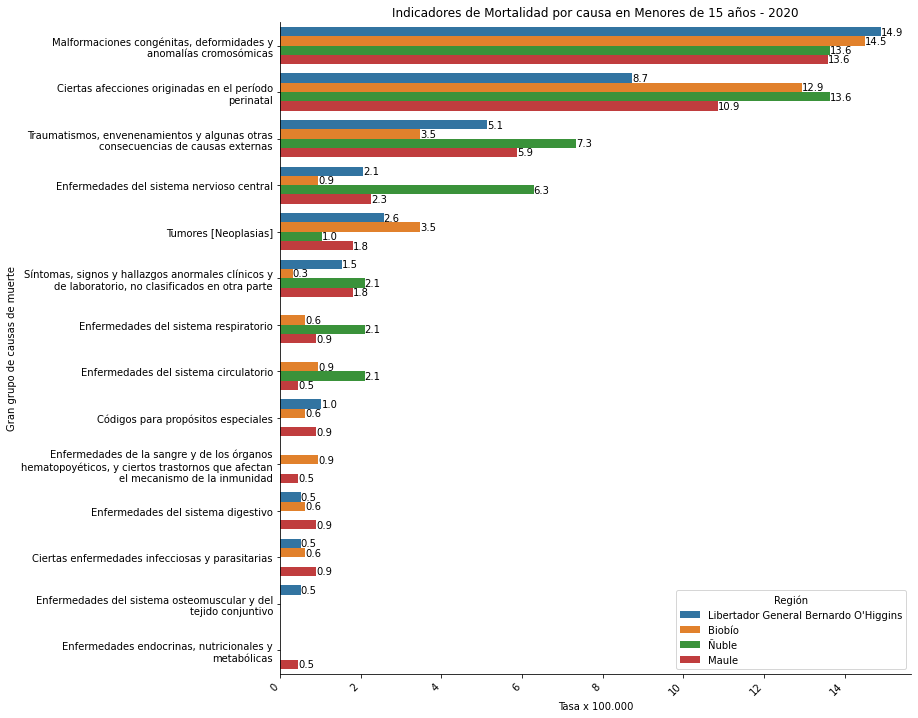

In [82]:
catp = (sns.catplot(y="GLOSA_CAPITULO_DIAG1", x="Tasa", hue="Region",
            kind="bar", ci=None, legend_out=False,orient="h",dodge = True,
            data=deis_zona_menores15_def_pop.reset_index(["Region"]).sort_values(by="Tasa",ascending=False),
           height=10, aspect=1.3)
       ).set(xlabel="Tasa x 100.000", ylabel='Gran grupo de causas de muerte',
             title="Indicadores de Mortalidad por causa en Menores de 15 años - 2020")


for ax in catp.axes.ravel():

    # extract labels
    labels = ax.get_yticklabels()
    # fix the labels
    for v in labels:
        text = v.get_text()
        text = '\n'.join(wrap(text, 50))
        v.set_text(text)
    # set the new labels
    ax.set_yticklabels(labels)
    # annotate the bars
    for c in ax.containers:
        # create a custom annotation: percent of total
        labels = [f'{v.get_width():0.1f}' for v in c]
        
        ax.bar_label(c, labels=labels, label_type='edge')
        
plt.tight_layout()
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'Región', loc='lower right')
plt.savefig("mortalidad_menores15_2020.png",dpi=300)

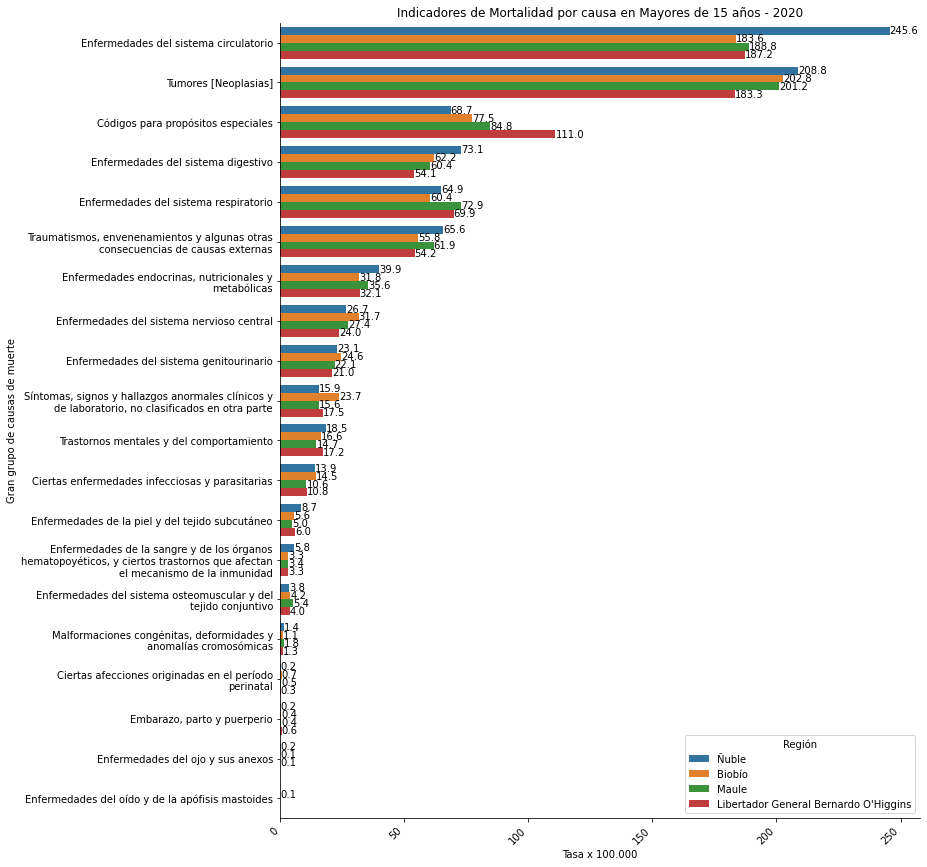

In [86]:
#plt.figure(figsize=(20,5))

catp = (sns.catplot(y="GLOSA_CAPITULO_DIAG1", x="Tasa", hue="Region",
            kind="bar", ci=None, legend_out=False,orient="h",dodge = True,
            data=deis_zona_mayores15_def_pop.reset_index(["Region"]).sort_values(by="Tasa",ascending=False),
           height=12, aspect=1.1)
       ).set(xlabel="Tasa x 100.000", ylabel='Gran grupo de causas de muerte',
             title="Indicadores de Mortalidad por causa en Mayores de 15 años - 2020")


for ax in catp.axes.ravel():

    # extract labels
    labels = ax.get_yticklabels()
    # fix the labels
    for v in labels:
        text = v.get_text()
        text = '\n'.join(wrap(text, 50))
        v.set_text(text)
    # set the new labels
    ax.set_yticklabels(labels)
    # annotate the bars
    for c in ax.containers:
        # create a custom annotation: percent of total
        labels = [f'{v.get_width():0.1f}' for v in c]
        
        ax.bar_label(c, labels=labels, label_type='edge')
        
plt.tight_layout()
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'Región', loc='lower right')
plt.savefig("mortalidad_mayores15_2020.png",dpi=300)

## population by area

In [71]:
# download INE 2017 county population data

# Poblacion urbana = 1 , rural = 2
region_pop_area = pd.read_excel("https://www.ine.cl/docs/default-source/proyecciones-de-poblacion/cuadros-estadisticos/base-2017/estimaciones-y-proyecciones-2002-2035-comuna-y-%C3%A1rea-urbana-y-rural11df0b16cde04242827bef3fd62529c5.xlsx")
        

In [72]:
region_pop_area.columns

Index(['Region', 'Nombre Region', 'Provincia', 'Nombre Provincia', 'Comuna',
       'Nombre Comuna', 'Sexo (1=Hombre 2=Mujer)', 'Area (1=Urbano 2=Rural)',
       'Grupo edad', 'Poblacion 2002', 'Poblacion 2003', 'Poblacion 2004',
       'Poblacion 2005', 'Poblacion 2006', 'Poblacion 2007', 'Poblacion 2008',
       'Poblacion 2009', 'Poblacion 2010', 'Poblacion 2011', 'Poblacion 2012',
       'Poblacion 2013', 'Poblacion 2014', 'Poblacion 2015', 'Poblacion 2016',
       'Poblacion 2017', 'Poblacion 2018', 'Poblacion 2019', 'Poblacion 2020',
       'Poblacion 2021', 'Poblacion 2022', 'Poblacion 2023', 'Poblacion 2024',
       'Poblacion 2025', 'Poblacion 2026', 'Poblacion 2027', 'Poblacion 2028',
       'Poblacion 2029', 'Poblacion 2030', 'Poblacion 2031', 'Poblacion 2032',
       'Poblacion 2033', 'Poblacion 2034', 'Poblacion 2035'],
      dtype='object')

In [73]:
region_pop_area_f1 = region_pop_area[["Area (1=Urbano 2=Rural)", "Nombre Region", "Poblacion 2020"]]

centrosur = ["Biobío","Libertador General Bernardo O'Higgins","Maule","Ñuble"]
zona_pop_area_f1 = region_pop_area_f1.query("`Nombre Region` in @centrosur")


# rename columns
zona_pop_area_f1 = zona_pop_area_f1.rename(columns={"Area (1=Urbano 2=Rural)": "Area", "Nombre Region": "Region"})

#sexo a categorical
zona_pop_area_f1.loc[:,"Area"] = np.where(zona_pop_area_f1["Area"]==1,"Urbano","Rural")

zona_pop_area_f1.head()

,Area,Region,Poblacion 2020
5616,Urbano,Libertador General Bernardo O'Higgins,1582
5617,Urbano,Libertador General Bernardo O'Higgins,6754
5618,Urbano,Libertador General Bernardo O'Higgins,9224
5619,Urbano,Libertador General Bernardo O'Higgins,9200
5620,Urbano,Libertador General Bernardo O'Higgins,8765


In [74]:
zona_pop2020_area = zona_pop_area_f1.groupby(["Region","Area"]).sum().reset_index()


In [75]:
bars = alt.Chart(zona_pop2020_area).mark_bar(
    #cornerRadiusTopLeft=3,
    #cornerRadiusTopRight=3
).encode(
    x = alt.X('Poblacion 2020:Q',title="Porcentaje Población", stack="normalize",axis=alt.Axis(format='%')),
    y = alt.Y('Region:O',title=""),
    color='Area:N'
).properties(
    title="Porcentaje Población Macrozona CentroSur"
)
text = alt.Chart(zona_pop2020_area).transform_joinaggregate(
    pop_sum='sum(Poblacion 2020)',
    groupby=['Region']
).transform_calculate(
    pop_norm=alt.datum["Poblacion 2020"] / alt.datum["pop_sum"]
).mark_text(dx=-15, dy=3, color='white').encode(
    x=alt.X('Poblacion 2020:Q',stack="normalize",axis=alt.Axis(format='%')),
    y=alt.Y('Region:O'),
    detail='Area:N',
    text=alt.Text('pop_norm:Q',format=".1%")
)

#(bars+text).save("zona_percentPop_2020.png",scale_factor=2.0)
bars+text

alt.LayerChart(...)

## Población discapacidad

In [148]:
## estudio nacional de la discapacidad 2015

In [61]:
disc_2015 = pd.read_excel("data/Pob_gradoDiscapacidad_2015.xlsx",header=[0,1])
disc_2015.rename(columns = {'Unnamed: 0_level_1':'','Unnamed: 1_level_1':'','Unnamed: 2_level_1':''},inplace=1)
disc_2015.head()

Regiones  \
                           
0  XV Arica y Parinacota   
1            I Tarapacá    
2        II Antofagasta    
3           III Atacama    
4           IV Coquimbo    

  Personas adultas sin situación de Discapacidad (PsSD)   \
                                                           
0                                              85555       
1                                             193201       
2                                             367586       
3                                             154745       
4                                             448307       

  Total población adulta (18 años o más)   \
                                            
0                                  120335   
1                                  234713   
2                                  405169   
3                                  201531   
4                                  557652   

  Personas adultas en situación de Discapacidad (PeSD)                    
                                       Leve a Moderada Severa Total PeSD  
0                                              21066    13714      34780  
1                                              18395    23117      41512  
2                                              25804    11779      37583  
3                                              23986    22800      46786  
4                                              70106    39239     109345

In [62]:
disc_2015.sort_index(axis=1,inplace=True)
disc_2015.drop("Personas adultas sin situación de Discapacidad (PsSD) ",axis=1,inplace=True)

disc_2015.loc[:,"Regiones"] = disc_2015["Regiones"].str.strip()

In [63]:
disc_2015.head()

Personas adultas en situación de Discapacidad (PeSD)                    \
                                       Leve a Moderada Severa Total PeSD   
0                                              21066    13714      34780   
1                                              18395    23117      41512   
2                                              25804    11779      37583   
3                                              23986    22800      46786   
4                                              70106    39239     109345   

                Regiones Total población adulta (18 años o más)   
                                                                  
0  XV Arica y Parinacota                                  120335  
1             I Tarapacá                                  234713  
2         II Antofagasta                                  405169  
3            III Atacama                                  201531  
4            IV Coquimbo                                  557652

In [64]:
# Personas adultas en situación de Discapacidad (PeSD)
disc_2015_f1 = disc_2015.set_index(["Regiones","Total población adulta (18 años o más) "]).droplevel(0,axis=1).reset_index()

In [65]:
disc_2015_f1.columns

Index(['Regiones', 'Total población adulta (18 años o más) ',
       'Leve a Moderada', 'Severa', 'Total PeSD'],
      dtype='object')

In [66]:
disc_2015_f2 = disc_2015_f1.set_index("Regiones")

In [67]:
disc_2015_f3 = disc_2015_f2.loc[:,["Leve a Moderada","Severa"]].divide(disc_2015_f2["Total población adulta (18 años o más) "],axis=0)

In [68]:
disc_2015_f3_m = disc_2015_f3.melt(var_name="Grado Discapacidad",value_name="% Población",ignore_index=False).reset_index()
disc_2015_f3_m.head()

,Regiones,Grado Discapacidad,% Población
0,XV Arica y Parinacota,Leve a Moderada,0.175061
1,I Tarapacá,Leve a Moderada,0.078372
2,II Antofagasta,Leve a Moderada,0.063687
3,III Atacama,Leve a Moderada,0.119019
4,IV Coquimbo,Leve a Moderada,0.125716


In [69]:
disc_2015_f3_m.groupby(["Regiones"]).sum()

,% Población
Regiones,
I Tarapacá,0.176863
II Antofagasta,0.092759
III Atacama,0.232153
IV Coquimbo,0.196081
IX Araucanía,0.160304
Total,0.200099
V Valparaíso,0.178898
VI O’Higgins,0.234510
VII Maule,0.202138


In [70]:
zone_reg = ["VII Maule", "VIII Biobío", "VI O’Higgins", "Total"]
disc_2015_zona = disc_2015_f3_m.query("Regiones in @zone_reg")

In [118]:
tchart = "Porcentaje de la población adulta en situación de discapacidad"

bar = alt.Chart(disc_2015_zona).mark_bar(
    #cornerRadiusTopLeft=3,
    #cornerRadiusTopRight=3
).encode(
    x = alt.X('sum(% Población):Q',title="Porcentaje Población",axis=alt.Axis(format='%'),stack="zero"),
    y = alt.Y('Regiones:O',title=""),
    color='Grado Discapacidad:N'
).properties(
    title=wrap(tchart,70)
)

text = alt.Chart(disc_2015_zona).mark_text(
    color='white',dx=-100
).encode(
    x=alt.X('sum(% Población):Q',axis=alt.Axis(format='%'),stack="zero"),
    y=alt.Y('Regiones:O'),
    detail='Grado Discapacidad:N',
    text=alt.Text('sum(% Población):Q',format=".1%")
)

#alt.layer(bar, text, data=disc_2015_f3_m).resolve_scale(color='independent')
(bar+text).save("zona_percentDiscapacidad_2015.png",scale_factor=2.0)
bar+text

alt.LayerChart(...)

In [136]:
10000/60

166.66666666666666